In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from bold_dementia.cogpred import make_training_data, make_all_data
from bold_dementia.utils.configuration import get_config

from neuroginius.atlas import Atlas
from bold_dementia.cogpred import plot_matrix, MatrixResult

config = get_config()
atlas = Atlas.from_name("schaefer200")
matrices, metadata = make_all_data(
    config["connectivity_matrices"],
    atlas.name,
    k=3,
    suffix="corr"
)
aal = atlas.from_name("aal")
aal.networks = list(map(lambda x: str(x).split("_")[0], aal.labels))

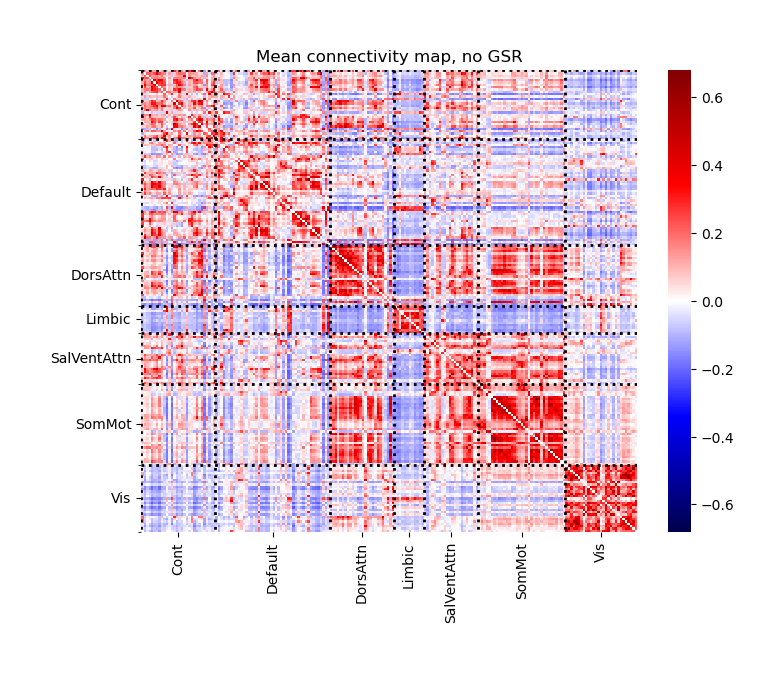

In [2]:
plot_matrix(matrices.mean(axis=0), atlas, cmap="seismic")
plt.title("Mean connectivity map, no GSR")
plt.show()

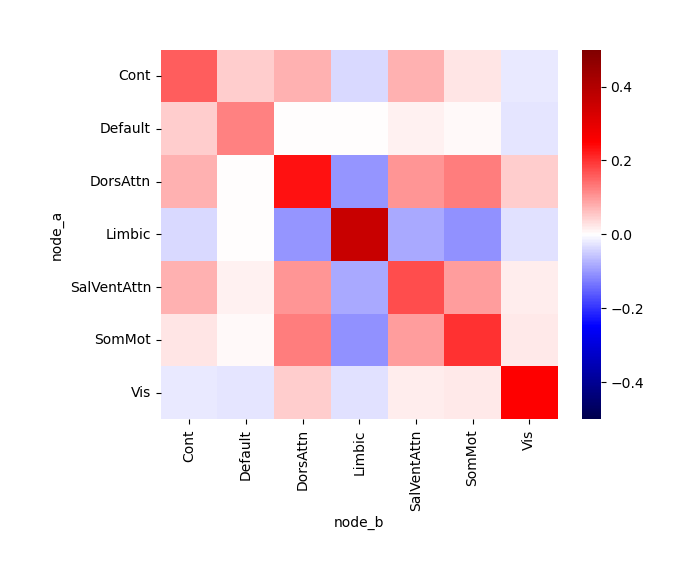

In [3]:
from functools import reduce
import seaborn as sns

mr = MatrixResult(matrices, atlas)
macro_matrix = reduce(lambda x, y: x.add(y) / 2, mr.get_macro_matrices())
sns.heatmap(macro_matrix, cmap="seismic", vmin=-0.5, vmax=0.5)
plt.show()

In [20]:
from bold_dementia.cogpred import extract_net, MockAtlas

In [26]:
dmn_conns = np.stack([extract_net(matrix, atlas, "Default")[0] for matrix in matrices])
_, regions = extract_net(matrices[0], atlas, "Default")

In [30]:
dmn_atlas = MockAtlas(regions)

In [44]:
comp_lst = []

matrix_res = MatrixResult(dmn_conns, dmn_atlas)
for i, sorted_mat in enumerate(matrix_res.sorted_matrices):
    gen = matrix_res._gen_macro_values(sorted_mat, lambda x: (x.mean(),))
    comparisons = pd.DataFrame(gen, columns=["node_a", "node_b", "connectivity"])
    comparisons["sub"] = metadata.loc[i, "sub"]
    comparisons["ses"] = metadata.loc[i, "ses"]
    comp_lst.append(comparisons)


In [49]:
pd.concat(comp_lst).to_csv("output/dmn_connectivities_allsubs.csv")

In [5]:
def get_values(region):
    return region.split("_")[1:]